# Import Libary

In [34]:
import pandas as pd
import statistics
import numpy as np
import scipy.stats as st
import seaborn as sns
from matplotlib import pyplot as plt
from statistics import variance
from scipy.stats import sem 
import warnings
warnings.filterwarnings('ignore')

# Import Data Set

In [2]:
df = pd.read_csv('nyc-rolling-sales.csv')

In [3]:
#Inpect Data Set 
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
#Drop Unnecessary Data
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
#Data Set Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null

**Conclusion:** No missing Values in the Data Set

In [8]:
#Split Columns to Numerical and Categorical 
numerical = df.select_dtypes('number').columns.tolist()
categorical = df.select_dtypes('object').columns.tolist()
print(numerical)
print("")
print(categorical)

['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE']

['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE']


# Desriptive Statistics

In [9]:
#Numerical Value 
df[numerical].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [25]:
#Variance of Numerical Data 
for i in numerical: 
    print(f'Variance for {i} is equal to {df[i].var()}')

Variance for BOROUGH is equal to 1.6635583710924047
Variance for BLOCK is equal to 12732503.739102311
Variance for LOT is equal to 433144.0659415073
Variance for ZIP CODE is equal to 1666368.972536637
Variance for RESIDENTIAL UNITS is equal to 279.59307883929864
Variance for COMMERCIAL UNITS is equal to 75.91956440873304
Variance for TOTAL UNITS is equal to 359.95896003024995
Variance for YEAR BUILT is equal to 288739.64196812856
Variance for TAX CLASS AT TIME OF SALE is equal to 0.6713200208727731


In [14]:
# Mean Value for Numerical Value 
for i in numerical: 
    print(f'Mean for {i} is equal to {df[i].mean()}')

Mean for BOROUGH is equal to 2.9987581019066094
Mean for BLOCK is equal to 4237.218976202867
Mean for LOT is equal to 376.22401476084593
Mean for ZIP CODE is equal to 10731.99161423097
Mean for RESIDENTIAL UNITS is equal to 2.0252637554998345
Mean for COMMERCIAL UNITS is equal to 0.19355868855561337
Mean for TOTAL UNITS is equal to 2.249183895538629
Mean for YEAR BUILT is equal to 1789.322976297488
Mean for TAX CLASS AT TIME OF SALE is equal to 1.657484505842835


In [15]:
# Median Value for Numerical Value 
for i in numerical: 
    print(f'Median for {i} is equal to {df[i].median()}')

Median for BOROUGH is equal to 3.0
Median for BLOCK is equal to 3311.0
Median for LOT is equal to 50.0
Median for ZIP CODE is equal to 11209.0
Median for RESIDENTIAL UNITS is equal to 1.0
Median for COMMERCIAL UNITS is equal to 0.0
Median for TOTAL UNITS is equal to 1.0
Median for YEAR BUILT is equal to 1940.0
Median for TAX CLASS AT TIME OF SALE is equal to 2.0


In [18]:
# Mode for Numerical Value 
for i in numerical: 
    print(f'Mode for {i} is equal to {(df[i].mode())[0]}')

Mode for BOROUGH is equal to 4
Mode for BLOCK is equal to 5066
Mode for LOT is equal to 1
Mode for ZIP CODE is equal to 10314
Mode for RESIDENTIAL UNITS is equal to 1
Mode for COMMERCIAL UNITS is equal to 0
Mode for TOTAL UNITS is equal to 1
Mode for YEAR BUILT is equal to 0
Mode for TAX CLASS AT TIME OF SALE is equal to 1


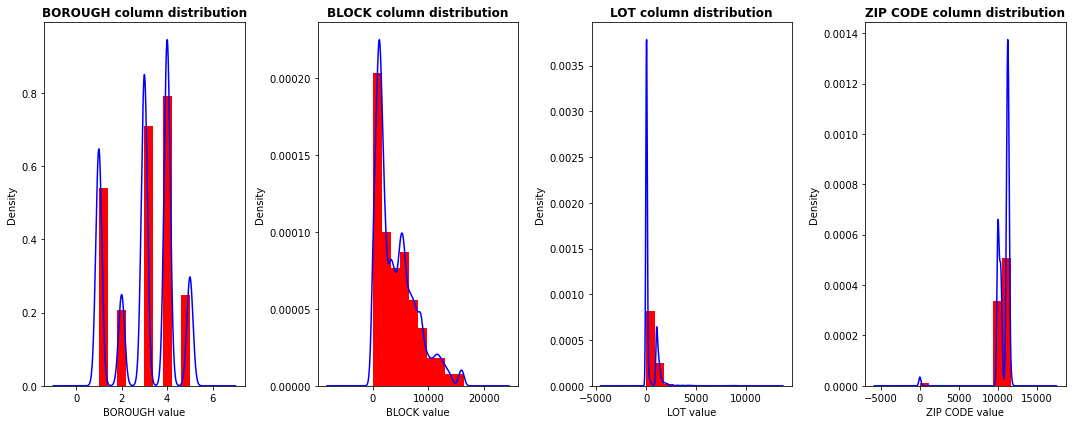

In [21]:
#Data Distribution for Numerical Value 
#Numerical data 
fig = plt.figure(figsize=(15,6))
ax_value = []
for x in range(len(numerical[0:4])): 
    ax_value.append(f'ax{x}')
                    
for i in range(len(numerical[0:4])):
    ax_value[i] = fig.add_subplot(1, len(numerical[0:4]), i + 1)
    df[numerical[i]].plot(kind='hist', density=True, color='red', ax=ax_value[i])
    df[numerical[i]].plot(kind='kde', color='blue', ax=ax_value[i])
    ax_value[i].set_title(f'{numerical[i]} column distribution', fontweight='bold')
    ax_value[i].set_xlabel(f'{numerical[i]} value')
    ax_value[i].set_ylabel('Density')
    plt.tight_layout()

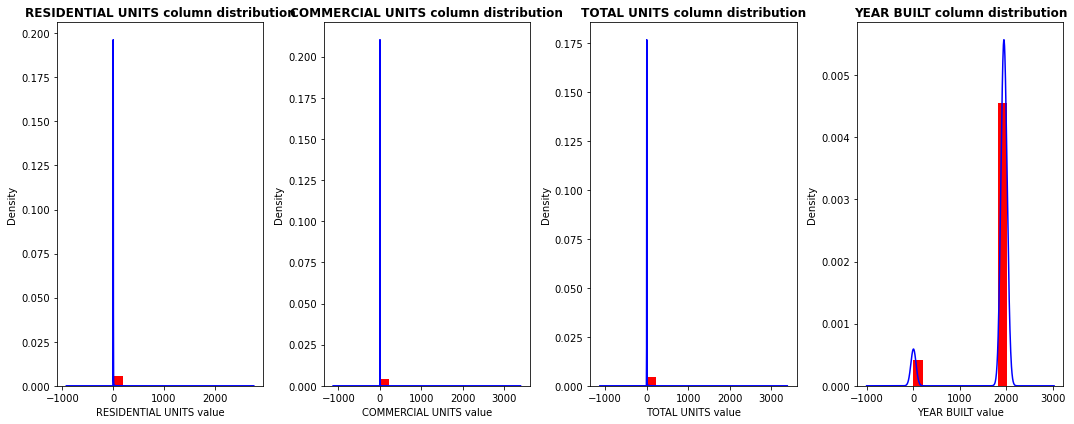

In [24]:
#Data Distribution for Numerical Data Cont'd
fig = plt.figure(figsize=(15,6))
ax_value = []
for x in range(len(numerical[4:8])): 
    ax_value.append(f'ax{x}')
                    
for i in range(len(numerical[4:8])):
    ax_value[i] = fig.add_subplot(1, len(numerical[4:8]), i + 1)
    df[numerical[i+4]].plot(kind='hist', density=True, color='red', ax=ax_value[i])
    df[numerical[i+4]].plot(kind='kde', color='blue', ax=ax_value[i])
    ax_value[i].set_title(f'{numerical[i+4]} column distribution', fontweight='bold')
    ax_value[i].set_xlabel(f'{numerical[i+4]} value')
    ax_value[i].set_ylabel('Density')
    plt.tight_layout()

**Conclusion:** There is no numerical data that is normally skewed

In [19]:
# Descriptive Statictics for Categorical Value 
df[categorical].describe()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,LAND SQUARE FEET,GROSS SQUARE FEET,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,84548,84548,84548,84548,84548,84548,84548,84548,84548,84548,84548,84548
unique,254,47,11,1,167,67563,3989,6062,5691,166,10008,364
top,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,,D4,131-05 40TH ROAD,,-,-,R4,-,2017-06-29 00:00:00
freq,3068,18235,38633,84548,12663,210,65496,26252,27612,12989,14561,544


# Hypothesis Testing

**The Question that would be answer for this Hypothesis testing is that:**
  
  
  Is there any difference in unit sold between property built in 1900 - 2000 and 2001 and so on? 
  
  The null Hypothesis (H0) : There is no difference from property built year for unit Sold
  
  The Alternative Hypothesis (H1) : There is a difference from property built year for unit sold

In [32]:
#Prepare the Data 
df_1900_2000 = df[(df['YEAR BUILT'] >= 1900) & (df['YEAR BUILT'] <= 2000)]
df_2001 = df[df['YEAR BUILT'] >= 2001]

In [35]:
#Deploy T Test Value 
ttest = st.ttest_ind(a = df_1900_2000['TOTAL UNITS'], b = df_2001['TOTAL UNITS'], equal_var=False)

In [36]:
#Pvalue 
ttest.pvalue

0.1279069442800836

In [39]:
if ttest.pvalue>0.05:
    print('There is no difference from property built year for Unit Sold')
else:
    print('There is a difference from property built year for unit sold')

There is no difference from property built year for Unit Sold


**Conclusion :** From Hypothesis Testing it would be concluded that there is no difference from property built year for Unit Sold